In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def diff_eq(t, s, params):
    s_dot = params.alpha*s**2 + params.beta*s + params.gamma + params.delta/s
    return s

def reach_sk(t, s, params):
    s_k = 1/params.alpha
    return s-s_k

In [20]:
N_total = 68301
N_average = N_total/65
#Define parametrs
alpha = 40/N_average**2
beta = 260/N_average
gamma = 1
delta = 1
N_0 = 40000


#Configure Event
reach_sk.terminal = True
reach_sk.direction = 1

#initial conditions
s_0 = params['N_0']
t_span = (0,100)

In [ ]:
from scipy.integrate import solve_ivp
sol = solve_ip(
    fun = lambda t, s: diff_eq(t, s, params),
    t_span = t_span,
    y0 = [s_0], 
    method = 'RK45',
    events = reach_sk
)

<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18177/1639341866.py:16: SyntaxWarning: invalid escape sequence '\g'
  ax1.set_xlabel('$\gamma$')
/tmp/ipykernel_18177/1639341866.py:17: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_ylabel('$s^\star$')
/tmp/ipykernel_18177/1639341866.py:10: RuntimeWarning: invalid value encountered in sqrt
  s_1 = -beta/2/alpha * (1 + np.sqrt(1 - 4*gamma_values*alpha/beta**2))
/tmp/ipykernel_18177/1639341866.py:11: RuntimeWarning: invalid value encountered in sqrt
  s_2 = -beta/2/alpha * (1 - np.sqrt(1 - 4*gamma_values*alpha/beta**2))


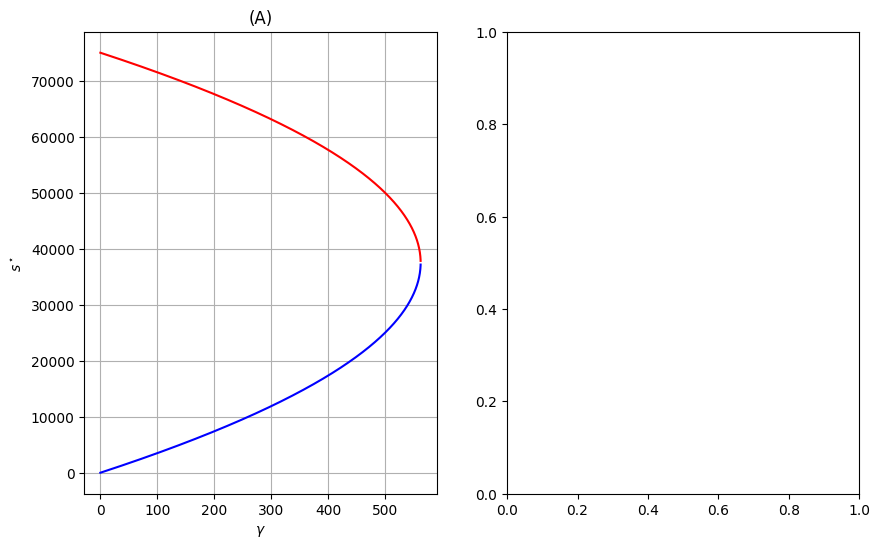

In [58]:
gamma_values = np.linspace(0,800,10000)

#Define parametrs
alpha = 4e-7
beta = -0.03
gamma = 0
delta = 0
N_0 = 40000

#Find gamam zeros
s_1 = -beta/2/alpha * (1 + np.sqrt(1 - 4*gamma_values*alpha/beta**2))
s_2 = -beta/2/alpha * (1 - np.sqrt(1 - 4*gamma_values*alpha/beta**2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
ax1.plot(gamma_values, s_1, 'r', gamma_values, s_2, 'b')
ax1.set_title('(A)')
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$s^\star$')
ax1.grid('on')

#find delta zeros
def s_dot(s, delta):
    return alpha*s**2 + beta*s + gamma + delta/s

from scipy.optimize import root_scalar

def find_root(delta, bracket):
    result = root_scalar(s_dot, args = (delta,), method = 'brentq', bracket=bracket)
    if result.converged:
        return result.root
    else:
        return None

delta_values = np.linspace(0,800,1000)*N_0
roots = []

In [84]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Parameters
alpha = 4e-7
beta = -0.03
gamma = 0
N_0 = 40000

# Define s_dot function
def s_dot(s, delta):
    return alpha * s**2 + beta * s + gamma + delta / s

# Delta values to evaluate
delta_values = np.linspace(0.1, 800, 1000) * N_0
roots_positive = []
roots_negative = []

# Find roots for each delta
roots = np.zeros([1000,3])
for i, delta in enumerate(delta_values):
        roots[i] = np.roots([alpha, beta, gamma, delta])

print(roots)

[[ 74998.22213794    366.04271268   -364.26485061]
 [ 74983.98070068   1104.02743475  -1088.00813543]
 [ 74969.72843243   1521.68159847  -1491.4100309 ]
 ...
 [ 51430.15568009  51430.15568009 -27860.31136019]
 [ 51436.305844    51436.305844   -27872.61168801]
 [ 51442.45232458  51442.45232458 -27884.90464915]]


/tmp/ipykernel_18177/1840589270.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  roots[i] = np.roots([alpha, beta, gamma, delta])


<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_18177/2299603038.py:11: SyntaxWarning: invalid escape sequence '\g'
  ax1.set_xlabel('$\gamma$')
/tmp/ipykernel_18177/2299603038.py:12: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_ylabel('$s^\star$')
/tmp/ipykernel_18177/2299603038.py:20: SyntaxWarning: invalid escape sequence '\d'
  ax2.set_xlabel('$\delta / N_0$')
/tmp/ipykernel_18177/2299603038.py:21: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel('$s^\star$')
/tmp/ipykernel_18177/2299603038.py:6: RuntimeWarning: invalid value encountered in sqrt
  s_1 = -beta / (2 * alpha) * (1 + np.sqrt(1 - 4

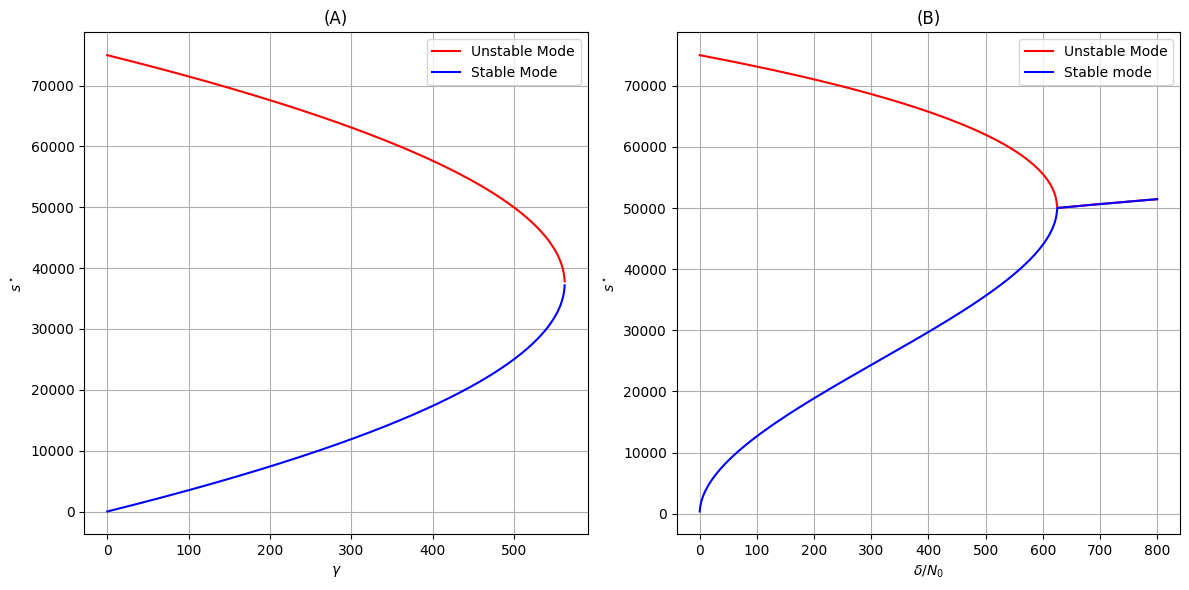

In [88]:
# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gamma values and roots
gamma_values = np.linspace(0, 800, 10000)
s_1 = -beta / (2 * alpha) * (1 + np.sqrt(1 - 4 * gamma_values * alpha / beta**2))
s_2 = -beta / (2 * alpha) * (1 - np.sqrt(1 - 4 * gamma_values * alpha / beta**2))
ax1.plot(gamma_values, s_1, 'r', label='Unstable Mode')
ax1.plot(gamma_values, s_2, 'b', label='Stable Mode')
ax1.set_title('(A)')
ax1.set_xlabel('$\gamma$')
ax1.set_ylabel('$s^\star$')
ax1.legend()
ax1.grid('on')

# Delta vs Roots
ax2.plot(delta_values / N_0, roots[:,0], 'r', label='Unstable Mode')
ax2.plot(delta_values / N_0, roots[:,1], 'b', label='Stable mode')
ax2.set_title('(B)')
ax2.set_xlabel('$\delta / N_0$')
ax2.set_ylabel('$s^\star$')
ax2.legend()
ax2.grid('on')
Sedona Scha
plt.tight_layout()
plt.show()

In [163]:
N_total = 68301
N_average = N_total/65*10 #Fudged. the paper is missing factor of 10
#Define parametrs
alpha = 40/N_average**2
beta = 260/N_average
print(alpha, beta)
gamma = 0
delta = 0
N_0 = 40000

# Define s_dot function
def s_dot(t, s, beta, gamma, delta):
    return alpha * s**2 + beta * s + gamma + delta / s

def reach_sk(t, s):
    s_k = 1/alpha
    return s_k-s[0]

reach_sk.terminal = True

3.622701743303522e-07 0.024743415176937383


<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:54: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\g'
<>:54: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_18177/1561618771.py:27: SyntaxWarning: invalid escape sequence '\g'
  ax1.plot(beta_values*N_0,max_ts[name], label =f'$\gamma$ = {name}')
/tmp/ipykernel_18177/1561618771.py:54: SyntaxWarning: invalid escape sequence '\d'
  ax1.plot(beta_values*N_0,max_ts[name], label =f'$\delta / N_0$ = {name}')
/tmp/ipykernel_18177/1561618771.py:27: SyntaxWarning: invalid escape sequence '\g'
  ax1.plot(beta_values*N_0,max_ts[name], label =f'$\gamma$ = {name}')
/tmp/ipykernel_18177/1561618771.py:54: SyntaxWarning: invalid escape sequence '\d'
  ax1.plot(beta_values*N_0,max_ts[name], label =f'$\delta / N_0$ = {name}')


KeyboardInterrupt: 

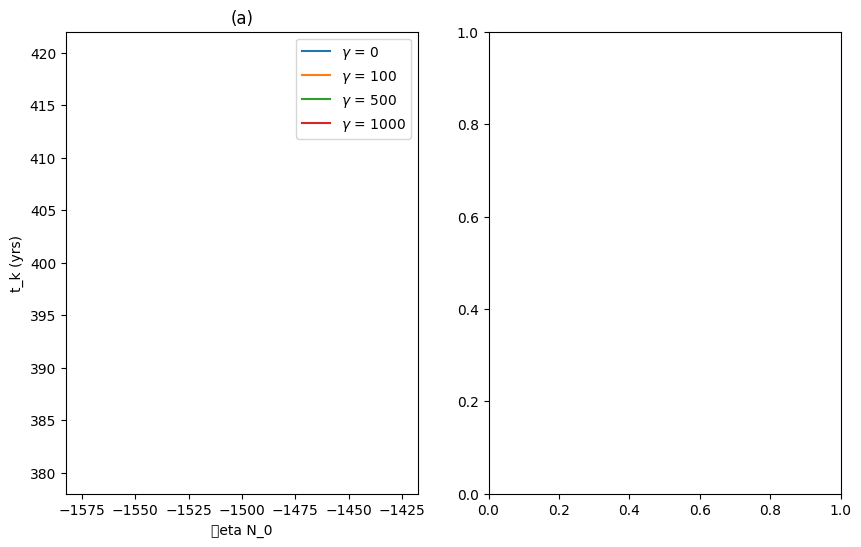

In [182]:
from scipy.integrate import solve_ivp
t_span = (0,400)

beta_values = np.linspace(-1500, 0, 1)/N_0
delta_values = [0, 100, 500, 1000]*N_0
gamma_values = [0, 100, 500, 1000]

max_ts = {}

#First graph
for i, gamma in enumerate(gamma_values):
    t_betas = []
    for i, beta in enumerate(beta_values):
        sol = solve_ivp(
            fun = lambda t, s: s_dot(t, s, beta, gamma, delta),
            t_span = t_span,
            y0 = [N_0], 
            method = 'RK45',
            events = reach_sk
        )
        t_betas.append(sol.t[-1])
        #t_betas.append(sol[-1,0])
    max_ts[f'{gamma}'] = t_betas 

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))
for name in max_ts:
    ax1.plot(beta_values*N_0,max_ts[name], label =f'$\gamma$ = {name}')

ax1.set_xlabel("\beta N_0")
ax1.set_ylabel("t_k (yrs)")
ax1.set_title("(a)")
ax1.legend()

max_ts = {}

#First graph
gamma = 0
for i, delta in enumerate(delta_values):
    t_betas = []
    for i, beta in enumerate(beta_values):
        sol = solve_ivp(
            fun = lambda t, s: s_dot(t, s, beta, gamma, delta),
            t_span = t_span,
            y0 = [N_0], 
            method = 'RK45',
            events = reach_sk
        )
        t_betas.append(sol.t[-1])
        #t_betas.append(sol[-1,0])
    max_ts[f'{gamma}'] = t_betas 

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))
for name in max_ts:
    ax1.plot(beta_values*N_0,max_ts[name], label =f'$\delta / N_0$ = {name}')

ax2.set_xlabel("\beta N_0")
ax2.set_ylabel("t_k (yrs)")
ax2.set_title("(b)")
ax2.legend()